# Lab 2: most effective ML algorithm

In [ ]:
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Get the data

The dataset is online, you can find information about its content and download it from the page: https://data.mendeley.com/datasets/8gx2fvg2k6/5

The go-to library for reading, writing and managing datasets is `pandas`, in this cell we will use it to read a file stored as `.csv`, using the function `read_csv`.

This will return a pandas `DataFrame`, which is the data structure used by this library to store tabular dataset.

If you use Google Colab, there are two ways in which you can read an external file, based on where you want to store it:

1. local file (i.e. stored on your machine):
```
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['file-name.csv']), encoding='latin-1')
```

2. file stored on Google Drive (i.e. remote storage):
```
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive
data = pd.read_csv('file-name.csv')
```

If you are using instead your machine to carry out the lab activity, just:
```
import pandas as pd
data = pd.read_csv('file-name.csv')
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/

Mounted at /content/drive/
/content/drive/MyDrive


(many of the error raised by the function `read_csv` are fixed by changing the encoding type.. look carefully at the error message!)

In [ ]:
import pandas as pd
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin-1')

## Get info about the data

 The function `info()` applied to a `DataFrame`, gives basic information about the dataset: its shape, its columns' names with their type and number of missing entries, the memory it requires.

In [ ]:
print('Basic Information About the dataset: ')
data.info()

Basic Information About the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  objec

### Take a subset of the data

From previous cell, we see that our dataset has $180519$ rows.. a lot!

Since the goal of this lab activity is not that of building a deployable model for the real world, but just that of wrapping up the content of the course, we reduce the number of rows to avoid enormous execution times.

**Caveat**: even if your machine / Colab session is endowed with GPU accelaration, it is not authomatically exploited!

There are many ways for reducing the size of a dataset, in what follows we will just select the ten most represented countries and three departments of our choice (and we will also drop a couple of columns).

In [ ]:
# Create a new feature which includes First and Last name.
data['Customer Full Name'] = data['Customer Fname'].astype(str) + data['Customer Lname'].astype(str)

# Drop features which are not too interesting
data = data.drop(['Customer Email', 'Customer Password','Customer Street',
                  'Customer Fname','Customer Lname', 'Latitude','Longitude',
                  'Product Description','Product Image', 'Order Zipcode',
                  'shipping date (DateOrders)'],
                 axis=1)

In [ ]:
# Find the ten most represented countries
most_frequent_countries = data['Order Country'].value_counts()[:10].keys()

# Keep only the data of such countries
data = data[data['Order Country'].isin(most_frequent_countries)]

# Keep only the data from these departments
data = data[data['Department Name'].isin(['Outdoors', 'Fitness', 'Technology'])]

Have a glance at the top rows of the dataset with the function `head`:

In [ ]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,Customer Full Name
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,Standard Class,OrliHendricks
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,Oceania,Queensland,CANCELED,1360,73,Smart watch,327.75,0,Standard Class,KimberlyFlowers


Check if and how many cells of the dataset are empty (missing values):

In [ ]:
data.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


Since our dataset is big and it has only one missing value in the column `Customer Zipcode`, we decide to drop the entire row (i.e. datapoint) corresponding to the missing data:

In [ ]:
data = data.dropna()

## A note on categorical features

When applying the method `info`, you might have noticed that several columns are of type `object`: this means that they are categorical attributes.

In principle this is totally fine, hower in what follows we will use the library `scikit-learn` for building our classifiers and regressors (arguably it is the most used among python ML practictioners), in which most machine learning models are designed to work with numerical data. **Therefore, you often need to preprocess your categorical features before feeding them into these models.**

The following are the most popular (~ effective) ways:
* One-Hot Encoding: convert categorical variables into a binary matrix (0s and 1s) where each category becomes a new column with a binary value (1 or 0).
`OneHotEncoder` in `scikit-learn` can be used for this purpose.
* Label Encoding: convert each category into a unique integer.
`LabelEncoder` in `scikit-learn` can be used for this purpose.

The following observations hold:
- Label Encoding is more memory-efficient compared to One-Hot Encoding, especially when dealing with a large number of categories. It represents categories with integers, requiring less memory.

- Label Encoding is sensitive to model assumptions: some machine learning algorithms may interpret the numeric labels as ordinal information, leading to biased results. This can affect the performance of models that assume features are continuous and have a meaningful order.

- One-Hot Encoding can lead to a high-dimensional dataset, especially when dealing with categorical features with a large number of unique values. This can make the dataset sparse and might pose challenges for some models.

It's often a good idea to experiment with both encoding methods and choose the one that works best for your particular use case.

We restate that the goal of this lab is not to build the _perfect_ model, hence we decide to use label encoding to save memory and computational time.




## A note on the choice of the techniques

This lab activity is meant to recap the content of the course seen so far, as well as a possible way to implement the studied algortihms without the need of re-inventing the wheel.

Many possible solutions are right, not a single one is perfect: here we show several possibilities for tuning and training several models. Of course, in real-world scenarios (and likely for the final project), they should be combined based on your needs and / or background knowledge.

## Classification

Given the above dataset, we solve the two following classification problems:

1. binary classification: predict whether an order will be marked as `late delivery`;

2. multiclass classification: predict the `Delivery Status` of each point in the dataset.

### Binary Classification

In [ ]:
# Import preproceesing algorithm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Import classification algorithms
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation algorithms
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc

In [ ]:
class_data = data.copy()

Let's begin by preparing the dataset: from the column `Delivery Status`, we get a binary label by setting to $1$ the cells containing the status `Late Delivery`, and $0$ all the others.

We use the library `numpy` to do this operation:

In [ ]:
# Create the target column 'late_delivery'
# np.where (condition, value_if_true, value_if_false)

class_data['late_delivery'] = np.where(class_data['Delivery Status'] == 'Late delivery', 1, 0)
class_data.drop(['Delivery Status'], axis=1, inplace=True)
class_data['late_delivery'].value_counts()

,count
late_delivery,
1,4356
0,3509


Encode categorical columns:

In [ ]:
categorical_columns = class_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
class_data[list(categorical_columns)] = class_data[list(categorical_columns)].apply(label_encoder.fit_transform)

Apply some pre-processing to make the classification interesting (i.e. non trivial), by dropping columns which are highly correlated with our target:

In [ ]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7865 entries, 1 to 179586
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           7865 non-null   int64  
 1   Days for shipping (real)       7865 non-null   int64  
 2   Days for shipment (scheduled)  7865 non-null   int64  
 3   Benefit per order              7865 non-null   float64
 4   Sales per customer             7865 non-null   float64
 5   Late_delivery_risk             7865 non-null   int64  
 6   Category Id                    7865 non-null   int64  
 7   Category Name                  7865 non-null   int64  
 8   Customer City                  7865 non-null   int64  
 9   Customer Country               7865 non-null   int64  
 10  Customer Id                    7865 non-null   int64  
 11  Customer Segment               7865 non-null   int64  
 12  Customer State                 7865 non-null   int6

#### Correlation analysis

Correlation analysis is a tool to check the behavior of every variable with respect to the other variables.

The correlation coefficient $\rho_{X_1,X_2} = \frac{Cov(X_1,X_2)}{\sigma_{X_1}\sigma_{X_2}}$ is a numerical measure that describes the strength and direction of a linear relationship between two variables $X_1,X_2$.
It ranges from -1 to +1:
*   -1 indicates a perfect negative correlation (when one variable increases, the other decreases).
*   +1 indicates a perfect positive correlation (when one variable increases, the other also increases).
* 0 indicates no linear correlation.

No linear correlation does not imply independence between two vairables. For example $Y = X^2$ show us two strongly dependant variables which are not linearly correlated.

Suppose that our data includes the following variables $X_1, X_2, X_3, Y$ where $Y$ is the target variable. Consider the following scenarios:
* Two independent variables $X_1$ and $X_2$ are strongly correlated, for example $\rho_{X_1,X_2} = -0.99$. This means that they carry the same information to the model, it is reasonable to drop one of such two variables. This situation also damages our training procedure, for details check *multicollinearity* topic.
* $X_1$ and $Y$ are strongly correlated $\rho_{X_1,Y} = 1.0$. Probably, there is a trivial relationship which links the variables. Consider a scenario in which we want to predict the acceleration $Y$ of an object given its color $X_1 = \text{Color}$ and the net force applied on it $X_2 = \text{Force}$. Sir Isaac Newton discovered that $F=ma$, so it is not useful to build a model on both $X_1$ and $X_2$ to predict $Y$. The model will discover something that we already know. It is better to drop $X_2$ and use ML model to discover if there is a relation between $Y$ and $X_1$. *Do green objects run faster than blue objects?*

* $X_1$ and $Y$ are correlated $\rho_{X_1,Y} = 0.7$. Nice! The variable $X_1$ can explain something about the behaviour of the target variable. A possible scenario could be $X_1 = \text{Body weight}$  $X_2 = \text{Age}$ and  $Y = \text{Height cm}$. When we train the model, we do not want to discard $X_1$ since could help us to discover some intersting relationship about this phenomenon.


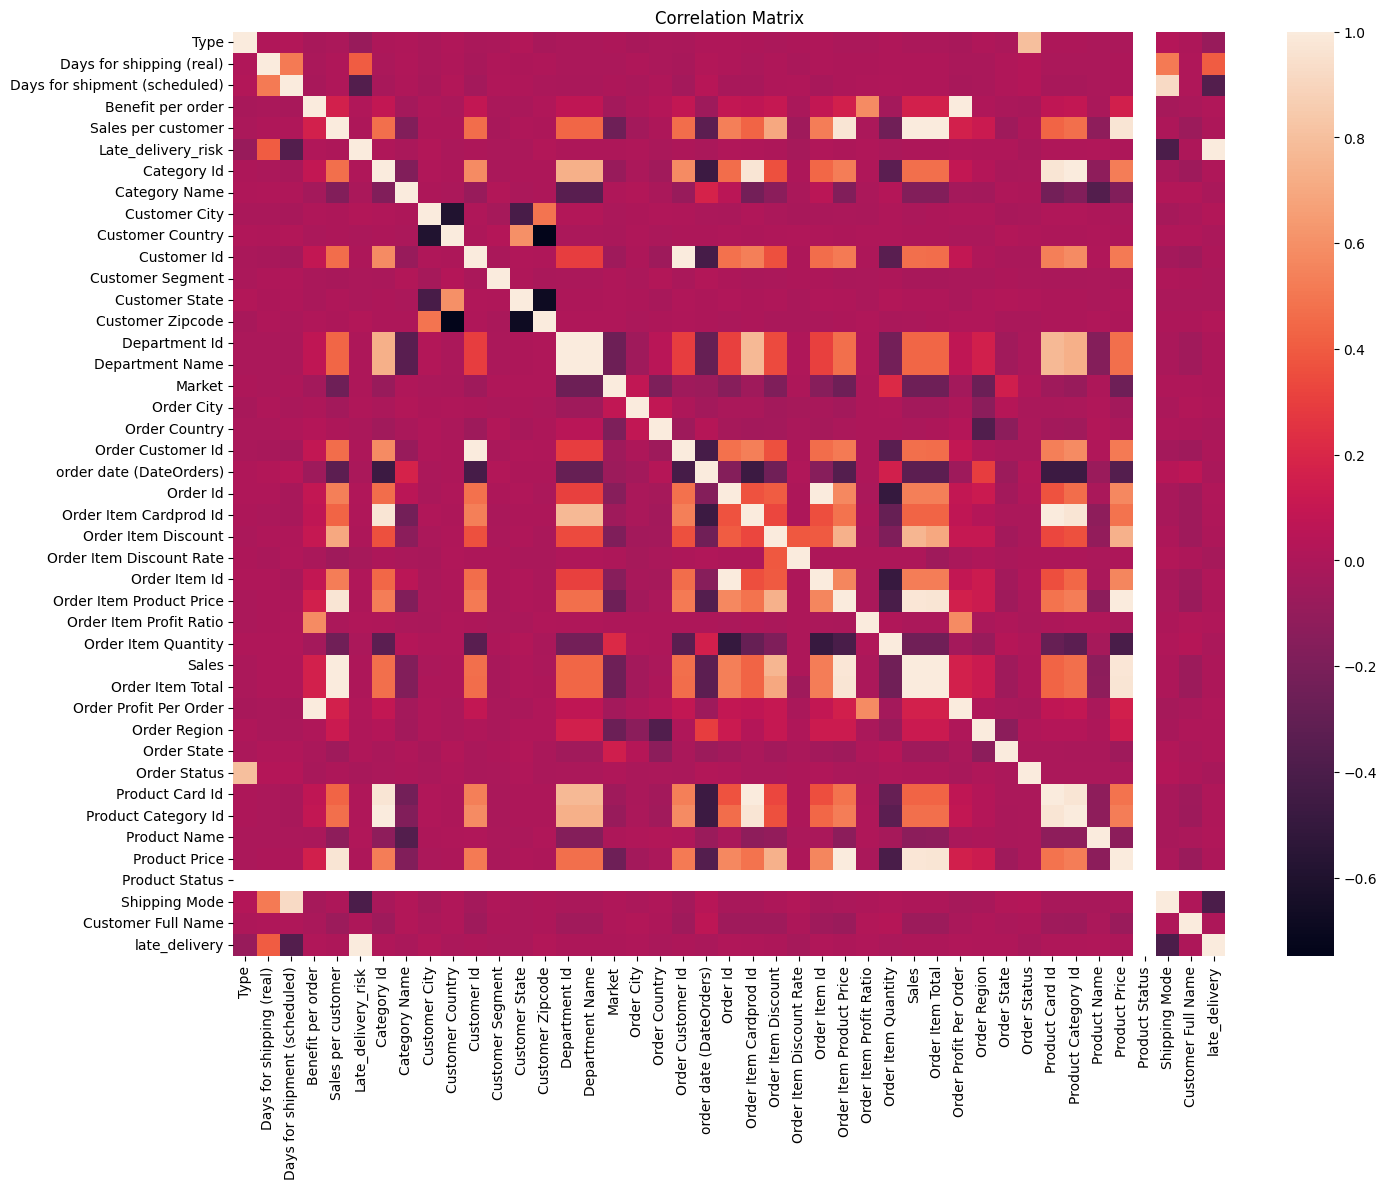

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(class_data.corr())
plt.title('Correlation Matrix')
plt.show()

Now, we check for feature correlation in the whole dataset.

In [ ]:
# Set the correlation threshold
threshold = 1.0  # Adjust as needed

# Calculate the correlation matrix and take the absolute value of the coefficients
corr_matrix = class_data.corr().abs()

# Filter for highly correlated features
highly_correlated = corr_matrix[corr_matrix >= threshold]

# Create a list to store the results
correlated_features = []

# Iterate and store correlated features
for col in highly_correlated.columns:
    for idx in highly_correlated[col].index:
        # The correlation matrix is symmetric and contains 1 in the diagonal
        if not pd.isnull(highly_correlated.loc[idx, col]) and idx < col:
            correlated_features.append([col, idx, highly_correlated.loc[idx, col]])

# Print results
correlated_features_df = pd.DataFrame(correlated_features, columns=['Feature 1', 'Feature 2', 'Correlation'])
print(correlated_features_df)

                Feature 1                 Feature 2  Correlation
0      Sales per customer          Order Item Total          1.0
1       Order Customer Id               Customer Id          1.0
2  Order Profit Per Order         Benefit per order          1.0
3         Product Card Id    Order Item Cardprod Id          1.0
4     Product Category Id               Category Id          1.0
5           Product Price  Order Item Product Price          1.0
6           late_delivery        Late_delivery_risk          1.0


It is interesting to notice that our target variable `late_delivery` has correlation 1.0 with variable `Late_delivery_risk`, this means that they encode the same information. We have to remove `Late_delivery_risk` otherwise the model will use just `Late_delivery_risk` to predict the output since there is a perfect correspondence between the target variable and an independent variable.

In [ ]:
# Remove features which belong to "Feature 2" of correlated_features_df
features_to_remove = correlated_features_df['Feature 2'].unique()

# Drop the columns from the DataFrame
class_data.drop(features_to_remove, axis=1, inplace=True)

Other columns might lead to the so-called _information leakage_. Also in this case, there is a dependance between the independant variables `Days for shipping (real)`, `Days for shipment (scheduled)`. If `Days for shipping (real)` > `Days for shipment (scheduled)` then the order must be late. However, the information about the days for shipping is unknown until the order is shipped.

In our task, we want to predict if a order is late before his shipment, so that kind of information won't be available when we will use such model. Let's remove these variables.

In [ ]:
class_data.drop(['Days for shipping (real)', 'Days for shipment (scheduled)'], axis=1, inplace=True)

#### Train and test set
Explicitly separate features and target columns:

In [ ]:
x_class = class_data.loc[:, class_data.columns != 'late_delivery']
y_class = class_data['late_delivery']

Split the data statically into train and test set using the `scikit-learn` apposite function `train_test_split`, here we decided to keep $20$% of the data for testing:

In [ ]:
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(x_class, y_class, test_size=0.2, random_state=26)

#### Normalization
Normalize the data to scale and standardize the features of your dataset so that they have a consistent range. This is important since different features could have very different orders of magnitude. Suppose that a variable $X_1$ ranges in $(0,2)$ and another variable $X_2$ in $(0,1000000)$, this leads to a high variance (which is bad) in the estimation of the parameters which link the variable $X_2$ to the output of our model. It is simple to prove this fact in the linear regression context.

Common methods for normalization include:

* Min-Max Scaling: scales the data to a specific range, typically [0, 1].

* Standardization: transforms the data to have a mean of 0 and a standard deviation of 1.

Here we use the latter, via the `scikit-learn` function `StandardScaler`:

In [ ]:
std_scaler = StandardScaler()
x_class_train = std_scaler.fit_transform(x_class_train)
x_class_test = std_scaler.transform(x_class_test)

*Post scriptum* : To scale the test data, it is more sensible to use the mean and the standar deviation computed in the train data. If scale the test data using the mean and the standard deviation computed directly on the test data, we introduce a bias in such data.

#### Comparing binary classification algorithm

We will use the following metrics to compare the results of several binary classification algorithms:

* Receiver Operating Characteristic (ROC) curve, to assess and visualize the trade-off between the true positive rate  and the false positive rate as the discrimination threshold varies. It will be displayed with its Area Under the Curve (AUC): higher AUC indicates better model performance, with a perfect classifier having an AUC of 1, and a random classifier having an AUC of 0.5.

  `scikit-learn` provides the function `roc_curve`, which takes in input the vector of ground-truth classes and probability estimates of the positive class, which can be obtained via the method `predict_proba` of each classifier model (having care of selecting the column corresponding to the positive class). `roc_curve` gives as output the false positive rate and the true positive rate, which can then be fed to the function `auc`, to get the AUC.

* Precision-Recall (PR) curve, another graphical tool used to assess the performance of a binary classification model, that focuses on the trade-off between precision and recall at different classification thresholds. It will be displayed with its Area Under the Curve (AUC-PR): a higher AUC-PR indicates better model performance, with a perfect classifier having an AUC-PR of 1.

  `scikit-learn` provides the function `precision_recall_curve`, taking the same inputs as `roc_curve`. `precision_recall_curve` gives as output the precision and the recall, which can then be fed to the function `auc`, to get the AUC-PR.

* Accuracy: ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances in the dataset.

  In `scikit-learn` it can be computed with the function `accuracy_score`, taking as input the true target and the predicted one.

In [ ]:
def compare_binary_classification(names, prec_rec_values, prec_rec_auc, roc_values, roc_auc, acc_values):
  """
      Compare the results of several binary classification algorithms.
      The metrics used are:
      - Receiver Operating Characteristic (ROC)
      - Precision-Recall
      - Accuracy

  """
  print(names)

  sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
  cmap = sns.color_palette('Paired')[1::2]
  fig, axs = plt.subplots(1, 3, figsize=(12, 5))
  for i in range(len(names)):
    axs[0].plot(roc_values[i][0], roc_values[i][1], label='{} AUC {:.3f}'.format(names[i], roc_auc[i]), c=cmap[i])
    axs[1].plot(prec_rec_values[i][1], prec_rec_values[i][0], label='{} AUC-PR {:.3f}'.format(names[i], prec_rec_auc[i]), c=cmap[i])
  axs[0].legend(loc='lower right')
  axs[0].set_xlabel('FPR')
  axs[0].set_ylabel('TPR')
  axs[0].set_title('ROC Curve')
  axs[1].legend(loc='lower left')
  axs[1].set_xlabel('Recall')
  axs[1].set_ylabel('Precision')
  axs[1].set_title('PR Curve')
  bars = axs[2].bar(x=np.arange(len(names)), height=acc_values, color=cmap)
  axs[2].set_xticks(np.arange(len(names)))
  axs[2].set_xticklabels(names)
  axs[2].set_ylim()
  for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, '{:.4f}'.format(yval))
  axs[2].set_ylabel('Accuracy')
  axs[2].set_title('Accuracy Bar Plots')
  plt.tight_layout()
  plt.show()

In [ ]:
# Useful containers
model_name_class, prec_rec_class, pr_auc_class, fpr_tpr_class, roc_auc_class, acc_class  = [[] for _ in range(6)]

#### A note on sklearn models

Most `scikit-learn` methods (both for regression and classification) share the same structure: after having instantiated a model, the method `fit` takes as input the train dataset and the train target, and trains the model. Then the updated model produces prediction with the function `predict`, having as input the test dataset.  

#### K-Fold Cross Validation

In these experiments, we will evaluate the performance of the regression algorithms via k-fold cross-validation.

To do, we will leverage the method `KFold` of `scikit-learn` which takes as input the number of folds in which we want to divide the dataset and a boolean value indicating whether or not we want to shuffle the data prior to creating the chunks.


#### Hyperparameter Tuning and Grid Search
In these experiments, we will optimize the performance of our models by tuning their hyperparameters using grid search.

We will utilize the `GridSearchCV` method from `scikit-learn`. This method explores a predefined grid of hyperparameter values, evaluating each combination through cross-validation. By comparing the performance across the grid, we identify the optimal hyperparameter settings that yield the best results for our specific dataset and task. The process involves defining a dictionary where keys represent hyperparameters and values specify the range of values to explore. GridSearchCV then trains and evaluates the model for each combination, ultimately selecting the best-performing one.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

We will use the following binary classification algorithms:

1. Random Forest (RF): `RandomForestClassifier`

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize k-fold cross-validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Set up the GridSearch with Random Forest and cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(x_class_train, y_class_train)

# Extract the best model
best_rf_classifier = grid_search.best_estimator_

# Predict and evaluate the best model on the test set
y_rf_class = best_rf_classifier.predict(x_class_test)
rf_class_accuracy = accuracy_score(y_rf_class, y_class_test)
acc_class.append(rf_class_accuracy)

# Get probabilities for precision-recall and ROC curves
rf_probs = best_rf_classifier.predict_proba(x_class_test)[:, 1]

# Precision-Recall
rf_precision, rf_recall, _ = precision_recall_curve(y_class_test, rf_probs)
rf_auc = auc(rf_recall, rf_precision)
prec_rec_class.append([rf_precision, rf_recall])
pr_auc_class.append(rf_auc)

# ROC
rf_fpr, rf_tpr, _ = roc_curve(y_class_test, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)
fpr_tpr_class.append([rf_fpr, rf_tpr])
roc_auc_class.append(rf_roc_auc)

# Save the best model parameters and performance metrics
model_name_class.append('RF')

2. Support Vector Machines (SVM): `SVC`

In [ ]:
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize k-fold cross-validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Set up the GridSearch with SVM and cross-validation
grid_search = GridSearchCV(
    estimator=SVC(probability=True),
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=10
)

# Fit the model with GridSearchCV
grid_search.fit(x_class_train, y_class_train)

# Extract the best model
best_sv_classifier = grid_search.best_estimator_

# Predict and evaluate the best model on the test set
y_sv_class = best_sv_classifier.predict(x_class_test)
sv_class_accuracy = accuracy_score(y_sv_class, y_class_test)
acc_class.append(sv_class_accuracy)

# Get probabilities for precision-recall and ROC curves
sv_probs = best_sv_classifier.predict_proba(x_class_test)[:, 1]

# Precision-Recall
sv_precision, sv_recall, _ = precision_recall_curve(y_class_test, sv_probs)
sv_auc = auc(sv_recall, sv_precision)
prec_rec_class.append([sv_precision, sv_recall])
pr_auc_class.append(sv_auc)

# ROC
sv_fpr, sv_tpr, _ = roc_curve(y_class_test, sv_probs)
sv_roc_auc = auc(sv_fpr, sv_tpr)
fpr_tpr_class.append([sv_fpr, sv_tpr])
roc_auc_class.append(sv_roc_auc)

# Save the best model parameters and performance metrics
model_name_class.append('SVC')

Fitting 3 folds for each of 4 candidates, totalling 12 fits


3. Naive Bayes (NB): `BernoulliNB`

  (the Bernoulli Naive Bayes algorithm is a variant of the Naive Bayes algorithm that is specifically designed for binary data, where features represent either presence or absence of a particular characteristic)

In [ ]:
# Naive Bayes
model_name_class.append('NB')
nb_classifier = BernoulliNB()

# Fit the model
nb_classifier.fit(x_class_train, y_class_train)

# Make predictions
y_nb_class = nb_classifier.predict(x_class_test)

# Evaluate metrics
nb_class_accuracy = accuracy_score(y_nb_class, y_class_test)
acc_class.append(nb_class_accuracy)
nb_probs = nb_classifier.predict_proba(x_class_test)[:, 1]
nb_precision, nb_recall, _ = precision_recall_curve(y_class_test, nb_probs)
nb_auc = auc(nb_recall, nb_precision)
prec_rec_class.append([nb_precision, nb_recall])
pr_auc_class.append(nb_auc)
nb_fpr, nb_tpr, _ = roc_curve(y_class_test, nb_probs)
nb_roc_auc = auc(nb_fpr, nb_tpr)
fpr_tpr_class.append([nb_fpr, nb_tpr])
roc_auc_class.append(nb_roc_auc)

4. K-Nearest Neighbors (KNN): `KNeighborsClassifier`

In [ ]:
# Define model name and parameter grid
model_name_class.append('KNN')
param_grid = {
    'n_neighbors': [3, 7],   # Range of neighbors to test
    'weights': ['uniform', 'distance'], # Use uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'] # Different distance metrics
}

# Set up K-Fold Cross-Validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_class_train, y_class_train)

# Best model from Grid Search
best_knn_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_knn_class = best_knn_classifier.predict(x_class_test)

# Evaluate metrics
knn_class_accuracy = accuracy_score(y_knn_class, y_class_test)
acc_class.append(knn_class_accuracy)
knn_probs = best_knn_classifier.predict_proba(x_class_test)[:, 1]

# Precision-Recall curve and AUC
knn_precision, knn_recall, _ = precision_recall_curve(y_class_test, knn_probs)
knn_auc = auc(knn_recall, knn_precision)
prec_rec_class.append([knn_precision, knn_recall])
pr_auc_class.append(knn_auc)

# ROC curve and AUC
knn_fpr, knn_tpr, _ = roc_curve(y_class_test, knn_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)
fpr_tpr_class.append([knn_fpr, knn_tpr])
roc_auc_class.append(knn_roc_auc)

5. Dummy Classifier (DUMMY): `DummyClassifier`

  (as a baseline)

In [ ]:
# dummy classifier
model_name_class.append('DUMMY')
dummy_classifier = DummyClassifier()
dummy_classifier.fit(x_class_train, y_class_train)
y_dummy_class = dummy_classifier.predict(x_class_test)
dummy_class_accuracy = accuracy_score(y_dummy_class, y_class_test)
acc_class.append(dummy_class_accuracy)
dummy_probs = dummy_classifier.predict_proba(x_class_test)[:, 1]
dummy_precision, dummy_recall, _ = precision_recall_curve(y_class_test, dummy_probs)
dummy_auc = auc(dummy_recall, dummy_precision)
prec_rec_class.append([dummy_precision, dummy_recall])
pr_auc_class.append(dummy_auc)
dummy_fpr, dummy_tpr, _ = roc_curve(y_class_test, dummy_probs)
dummy_roc_auc = auc(dummy_fpr, dummy_tpr)
fpr_tpr_class.append([dummy_fpr, dummy_tpr])
roc_auc_class.append(dummy_roc_auc)

In [ ]:
#remoove 4th element of the list names
model_name_class

['RF', 'SVC', 'NB', 'KNN', 'DUMMY']

Finally compare the collected results:

['RF', 'SVC', 'NB', 'KNN', 'DUMMY']


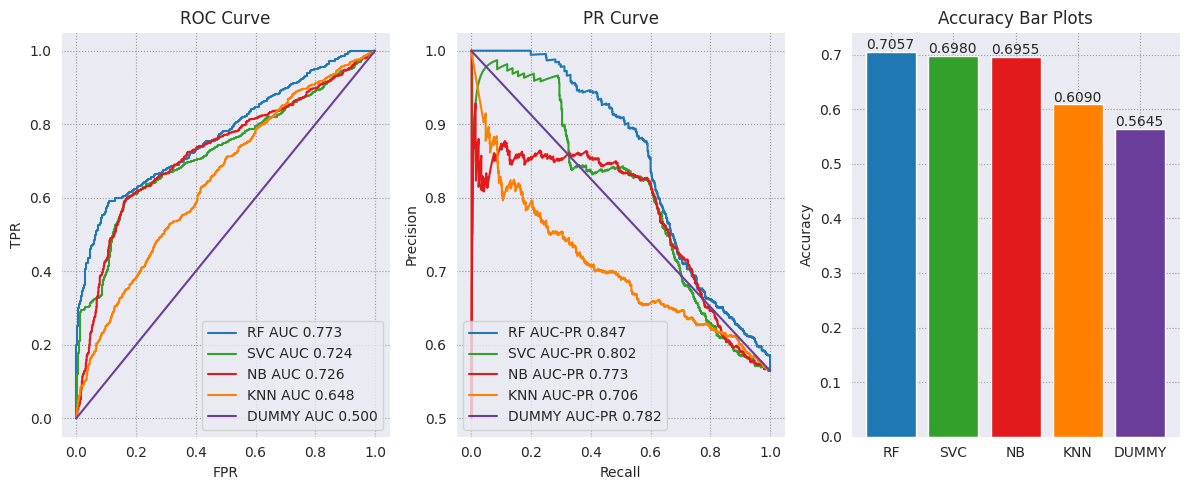

In [ ]:
compare_binary_classification(model_name_class, prec_rec_class, pr_auc_class, fpr_tpr_class, roc_auc_class, acc_class)

According to this result, the best model for the first task is Random Forest. Hooray!


## Regression

Given the original dataset, we now compare regression models towards the task of predicting the amount of `Sales`

In [ ]:
# import regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
# import evaluation algorithm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Pre-process and split into features and target:

In [ ]:
reg_data = data.copy()
categorical_columns = reg_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
reg_data[list(categorical_columns)] = reg_data[list(categorical_columns)].apply(label_encoder.fit_transform)

Check the distribution of the `Sales`

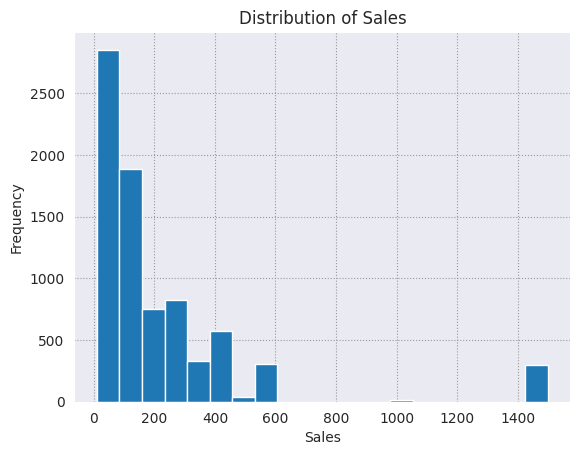

In [ ]:
plt.hist(reg_data['Sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

In [ ]:
reg_data.describe()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,Customer Full Name
count,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,...,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.0,7865.000000,7865.000000
mean,1.677940,3.502479,2.922187,23.757556,195.026642,1.146599,0.553846,37.645900,8.835346,188.484425,...,6.094851,103.215003,3.876669,797.589828,37.645900,36.898029,168.194809,0.0,2.227845,2177.851240
std,0.997659,1.634454,1.381021,166.538875,262.580296,0.961886,0.497124,18.179424,6.146832,157.447831,...,3.964158,58.284429,2.279558,385.807217,18.179424,21.614667,303.180649,0.0,1.104860,1111.186626
min,0.000000,0.000000,0.000000,-3442.500000,7.490000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,2.000000,0.000000,9.990000,0.0,0.000000,0.000000
25%,1.000000,2.000000,2.000000,4.350000,53.740002,1.000000,0.000000,33.000000,4.000000,64.000000,...,3.000000,53.000000,2.000000,715.000000,33.000000,20.000000,24.990000,0.0,2.000000,1236.000000
50%,2.000000,3.000000,4.000000,19.680000,103.900002,1.000000,1.000000,37.000000,8.000000,90.000000,...,6.000000,95.000000,3.000000,821.000000,37.000000,35.000000,44.990002,0.0,3.000000,2418.000000
75%,3.000000,5.000000,4.000000,51.790001,236.240005,1.000000,1.000000,41.000000,13.000000,314.000000,...,10.000000,153.000000,6.000000,917.000000,41.000000,57.000000,179.990005,0.0,3.000000,2884.000000
max,3.000000,6.000000,4.000000,720.299988,1500.000000,3.000000,1.000000,73.000000,21.000000,549.000000,...,11.000000,209.000000,8.000000,1360.000000,73.000000,70.000000,1500.000000,0.0,3.000000,4135.000000


from matplotlib import pyplot as plt
_df_0['Type'].plot(kind='hist', bins=20, title='Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Days for shipping (real)'].plot(kind='hist', bins=20, title='Days for shipping (real)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Days for shipment (scheduled)'].plot(kind='hist', bins=20, title='Days for shipment (scheduled)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Benefit per order'].plot(kind='hist', bins=20, title='Benefit per order')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Type', y='Days for shipping (real)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Days for shipping (real)', y='Days for shipment (scheduled)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Days for shipment (scheduled)', y='Benefit per order', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Benefit per order', y='Sales per customer', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Type'].plot(kind='line', figsize=(8, 4), title='Type')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Days for shipping (real)'].plot(kind='line', figsize=(8, 4), title='Days for shipping (real)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Days for shipment (scheduled)'].plot(kind='line', figsize=(8, 4), title='Days for shipment (scheduled)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Benefit per order'].plot(kind='line', figsize=(8, 4), title='Benefit per order')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
x_reg = reg_data.loc[:, reg_data.columns != 'Sales']
y_reg = reg_data['Sales']
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=26)

We will use the following metrics to compare the results of several regression algorithms:

* Mean Absolute Error (MAE): `mean_absolute_error` in `scikit-learn`;

* Mean Squared Error (MSE): `mean_squared_error` in `scikit-learn`;

* Mean Absolute Percentage Error (MAPE): `mean_absolute_percentage_error` in `scikit-learn`.

All methods takes in input ground truth target vector and predicted values.

For each of them, we will show a boxplot summarizing the results of the cross-validation procedure.

In [ ]:
# dataframe for storing results in a convenient way for shwing boxplot later
reg_metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'MAPE'])

We will use the following regression algorithms:

1. Random Forest (RF): `RandomForestRegressor`

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],         # Number of trees in the forest
    'max_depth': [None, 10,],        # Maximum depth of each tree
    'min_samples_split': [2, 5],        # Minimum samples required to split a node
    'max_features': ['sqrt', 'log2'] # Number of features to consider at each split
}

# Initialize K-Fold Cross-Validation
rf_kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=rf_kfolds,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(x_reg_train, y_reg_train)

# Retrieve the best estimator after Grid Search
best_rf_regressor = grid_search.best_estimator_

# Perform predictions on the test set
y_rf_reg = best_rf_regressor.predict(x_reg_test)

# Save regression metrics
rf_mae = mean_absolute_error(y_reg_test, y_rf_reg)
rf_mse = mean_squared_error(y_reg_test, y_rf_reg)
rf_mape = mean_absolute_percentage_error(y_reg_test, y_rf_reg)
reg_metrics.loc[len(reg_metrics)] = ['RF', rf_mae, rf_mse, rf_mape]

2. Support Vector Machines (SVM): `SVR`

In [ ]:
# Since SVM are computationally expensive, we use only 10% of the original data
# and we consider a very small parameter grid.

x_reg_train_svm = x_reg_train.sample(frac=0.001, random_state=42)
y_reg_train_svm = y_reg_train.loc[x_reg_train_svm.index]
x_reg_test_svm = x_reg_test.sample(frac=0.001, random_state=42)
y_reg_test_svm = y_reg_test.loc[x_reg_test_svm.index]


# Define the parameter grid for Grid Search
param_grid = {
    'C': [1],                     # Regularization parameter
    'kernel': ['linear']        # Kernel type
}

# Initialize K-Fold Cross-Validation
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=SVR(),
                           param_grid=param_grid,
                           cv=kfolds,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(x_reg_train_svm, y_reg_train_svm)

# Retrieve the best estimator after Grid Search
best_sv_regressor = grid_search.best_estimator_

# Perform predictions on the test set
y_sv_reg = best_sv_regressor.predict(x_reg_test_svm)

# Save regression metrics
sv_mae = mean_absolute_error(y_reg_test_svm, y_sv_reg)
sv_mse = mean_squared_error(y_reg_test_svm, y_sv_reg)
sv_mape = mean_absolute_percentage_error(y_reg_test_svm, y_sv_reg)
reg_metrics.loc[len(reg_metrics)] = ['SVM', sv_mae, sv_mse, sv_mape]

3. K-Nearest Neighbors (KNN): `KNeighborsRegressor`

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 9],       # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function
    'metric': ['euclidean', 'manhattan'] # Distance metric
}

# Initialize K-Fold Cross-Validation
knn_kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=KNeighborsRegressor(),
                           param_grid=param_grid,
                           cv=knn_kfolds,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(x_reg_train, y_reg_train)

# Retrieve the best estimator after Grid Search
best_knn_regressor = grid_search.best_estimator_

# Perform predictions on the test set
y_knn_reg = best_knn_regressor.predict(x_reg_test)

# Save regression metrics
knn_mae = mean_absolute_error(y_reg_test, y_knn_reg)
knn_mse = mean_squared_error(y_reg_test, y_knn_reg)
knn_mape = mean_absolute_percentage_error(y_reg_test, y_knn_reg)
reg_metrics.loc[len(reg_metrics)] = ['KNN', knn_mae, knn_mse, knn_mape]

4. Dummy Regressor (DUMMY): `DummyRegressor`

  (as a baseline)

In [ ]:
# dummy regressor
dummy_kfolds = KFold(n_splits=10, shuffle=True)
dummy_regressor = DummyRegressor()
dummy_regressor.fit(x_reg_train, y_reg_train)
y_dummy_reg = dummy_regressor.predict(x_reg_test)
current_dummy_mae = mean_absolute_error(y_reg_test, y_dummy_reg)
current_dummy_mse = mean_squared_error(y_reg_test, y_dummy_reg)
current_dummy_mape = mean_absolute_percentage_error(y_reg_test, y_dummy_reg)
reg_metrics.loc[len(reg_metrics)] = ['DUMMY', current_dummy_mae, current_dummy_mse, current_dummy_mape]

Finally we compare the results:

In [ ]:
reg_metrics

,Model,MAE,MSE,MAPE
0,RF,2.057289,19.769766,0.019280
1,SVM,237.686389,65670.586614,4.027732
2,KNN,51.079907,7657.239451,0.741062
3,DUMMY,183.935481,91648.354763,2.193777
